<a href="https://colab.research.google.com/github/angiew-02/AHI-Capstone-Project/blob/main/AHI_Capstone_25'.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Installing libraries
!pip install seaborn
!pip install pandas
!pip install numpy
!pip3 install pandas
!pip install matplotlib
!pip install xgboost
!pip install catboost
!pip install regex
!pip install scikit-learn
!pip install lightgbm
!pip install missingno
!pip install plotly.express

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
#import statsmodels.api as sm
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets
from sklearn.linear_model import LinearRegression  # Linear regression model
from sklearn.metrics import mean_squared_error, r2_score  # Evaluation metrics
import matplotlib.pyplot as plt  # For data visualization

In [3]:
heartdisease = pd.read_csv('/content/Rates_and_Trends_in_Heart_Disease_and_Stroke_Mortality_Among_US_Adults__35___by_County__Age_Group__Race_Ethnicity__and_Sex___2000-2019.csv')

In [4]:
print(heartdisease.columns)

Index(['Year', 'LocationAbbr', 'LocationDesc', 'GeographicLevel', 'DataSource',
       'Class', 'Topic', 'Data_Value', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'Confidence_limit_Low', 'Confidence_limit_High',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3',
       'LocationID'],
      dtype='object')


In [5]:
print(heartdisease.dtypes)

Year                            int64
LocationAbbr                   object
LocationDesc                   object
GeographicLevel                object
DataSource                     object
Class                          object
Topic                          object
Data_Value                    float64
Data_Value_Unit                object
Data_Value_Type                object
Data_Value_Footnote_Symbol     object
Data_Value_Footnote            object
Confidence_limit_Low          float64
Confidence_limit_High         float64
StratificationCategory1        object
Stratification1                object
StratificationCategory2        object
Stratification2                object
StratificationCategory3        object
Stratification3                object
LocationID                    float64
dtype: object


In [6]:
heartdisease.head(10)

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,...,Data_Value_Footnote,Confidence_limit_Low,Confidence_limit_High,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,LocationID
0,1999,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001.0
1,2013,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001.0
2,2014,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001.0
3,2005,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001.0
4,2012,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001.0
5,2010,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001.0
6,2009,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001.0
7,2011,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001.0
8,2007,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001.0
9,2019,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001.0


In [7]:
# Checking for amount of null/missing values.
def missing (heartdisease):
    missing_number = heartdisease.isnull().sum().sort_values(ascending=False)
    missing_percent = ((heartdisease.isnull().sum()/heartdisease.isnull().count())*100).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent %'])
    return missing_values

missing(heartdisease)

,Missing_Number,Missing_Percent %
Data_Value_Footnote,503331,66.970965
Data_Value_Footnote_Symbol,503331,66.970965
Confidence_limit_High,248236,33.029168
Data_Value,248235,33.029035
Confidence_limit_Low,248235,33.029035
Stratification2,1,0.000133
StratificationCategory3,1,0.000133
Stratification3,1,0.000133
LocationID,1,0.000133
StratificationCategory1,1,0.000133


In [8]:
heartdisease.replace('?', np.nan, inplace=True)

In [9]:
heartdisease.drop_duplicates(inplace=True)

In [10]:
columns_to_drop = [
     'LocationDesc', 'GeographicLevel', 'DataSource', 'Class','Data_Value_Unit', 'Data_Value_Type','Data_Value_Footnote','StratificationCategory1', 'StratificationCategory2','StratificationCategory3','LocationID','Data_Value_Footnote_Symbol'
]
# Drop only existing columns
existing_cols = [col for col in columns_to_drop if col in heartdisease.columns]
heartdisease_cleaned = heartdisease.drop(columns=existing_cols)
print(heartdisease_cleaned.head(10))

   Year LocationAbbr              Topic  Data_Value  Confidence_limit_Low  \
0  1999           AL  All heart disease         NaN                   NaN   
1  2013           AL  All heart disease         NaN                   NaN   
2  2014           AL  All heart disease         NaN                   NaN   
3  2005           AL  All heart disease         NaN                   NaN   
4  2012           AL  All heart disease         NaN                   NaN   
5  2010           AL  All heart disease         NaN                   NaN   
6  2009           AL  All heart disease         NaN                   NaN   
7  2011           AL  All heart disease         NaN                   NaN   
8  2007           AL  All heart disease         NaN                   NaN   
9  2019           AL  All heart disease         NaN                   NaN   

   Confidence_limit_High   Stratification1                Stratification2  \
0                    NaN  Ages 35-64 years  American Indian/Alaska Native  

In [11]:
heartdisease_cleaned.head(10)

,Year,LocationAbbr,Topic,Data_Value,Confidence_limit_Low,Confidence_limit_High,Stratification1,Stratification2,Stratification3
0,1999,AL,All heart disease,NaN,NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
1,2013,AL,All heart disease,NaN,NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
2,2014,AL,All heart disease,NaN,NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
3,2005,AL,All heart disease,NaN,NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
4,2012,AL,All heart disease,NaN,NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
5,2010,AL,All heart disease,NaN,NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
6,2009,AL,All heart disease,NaN,NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
7,2011,AL,All heart disease,NaN,NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
8,2007,AL,All heart disease,NaN,NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
9,2019,AL,All heart disease,NaN,NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall


In [12]:
heartdisease_cleaned.rename(columns={
    'Stratification1': 'Age',
    'Stratification2': 'Race',
    'Stratification3': 'Gender',
    'Topic':'Disease Type'
}, inplace=True)

In [13]:
# Encode 'ages' as binary (Ages 35-64 years: 1, Ages 65 and older: 0)
heartdisease_cleaned['Age'] = heartdisease_cleaned['Age'].replace({'Ages 35-64 years': 1, 'Ages 65 and older': 0})

print(heartdisease_cleaned['Age'].value_counts())

Age
1                          376085
Ages 65 years and older    375480
Name: count, dtype: int64


In [14]:
heartdisease_cleaned.head(10)

,Year,LocationAbbr,Disease Type,Data_Value,Confidence_limit_Low,Confidence_limit_High,Age,Race,Gender
0,1999,AL,All heart disease,NaN,NaN,NaN,1,American Indian/Alaska Native,Overall
1,2013,AL,All heart disease,NaN,NaN,NaN,1,American Indian/Alaska Native,Overall
2,2014,AL,All heart disease,NaN,NaN,NaN,1,American Indian/Alaska Native,Overall
3,2005,AL,All heart disease,NaN,NaN,NaN,1,American Indian/Alaska Native,Overall
4,2012,AL,All heart disease,NaN,NaN,NaN,1,American Indian/Alaska Native,Overall
5,2010,AL,All heart disease,NaN,NaN,NaN,1,American Indian/Alaska Native,Overall
6,2009,AL,All heart disease,NaN,NaN,NaN,1,American Indian/Alaska Native,Overall
7,2011,AL,All heart disease,NaN,NaN,NaN,1,American Indian/Alaska Native,Overall
8,2007,AL,All heart disease,NaN,NaN,NaN,1,American Indian/Alaska Native,Overall
9,2019,AL,All heart disease,NaN,NaN,NaN,1,American Indian/Alaska Native,Overall


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import chi2_contingency
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from scipy.stats import f_oneway

T-Test

In [29]:
from scipy.stats import ttest_ind

binary_vars = ['Gender', 'Disease Type']

for var in binary_vars:
    group0 = heartdisease_cleaned[heartdisease_cleaned[var] == heartdisease_cleaned[var].unique()[0]]['Data_Value']
    group1 = heartdisease_cleaned[heartdisease_cleaned[var] == heartdisease_cleaned[var].unique()[1]]['Data_Value']
    stat, p = ttest_ind(group0, group1, nan_policy='omit')
    print(f"T-test for {var}: t-statistic = {stat:.4f}, p-value = {p:.4f}")

T-test for Gender: t-statistic = -68.7074, p-value = 0.0000
T-test for Disease Type: t-statistic = 231.9168, p-value = 0.0000


<Axes: xlabel='Gender', ylabel='Data_Value'>

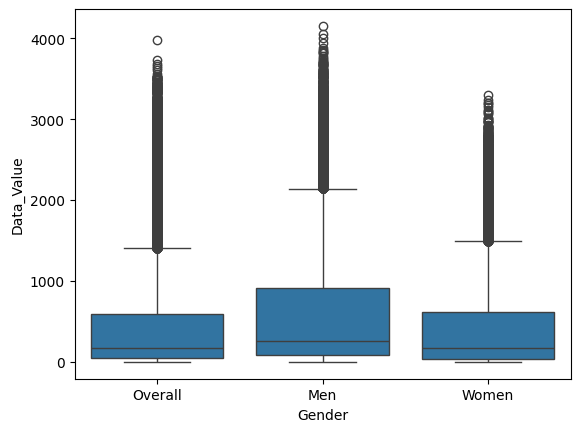

In [32]:
import seaborn as sns
sns.boxplot(data=heartdisease_cleaned, x='Gender', y='Data_Value')

In [30]:
from scipy.stats import ttest_ind

binary_vars = ['Age', 'Disease Type']

for var in binary_vars:
    group0 = heartdisease_cleaned[heartdisease_cleaned[var] == heartdisease_cleaned[var].unique()[0]]['Data_Value']
    group1 = heartdisease_cleaned[heartdisease_cleaned[var] == heartdisease_cleaned[var].unique()[1]]['Data_Value']
    stat, p = ttest_ind(group0, group1, nan_policy='omit')
    print(f"T-test for {var}: t-statistic = {stat:.4f}, p-value = {p:.4f}")

T-test for Age: t-statistic = -676.9028, p-value = 0.0000
T-test for Disease Type: t-statistic = 231.9168, p-value = 0.0000


<Axes: xlabel='Age', ylabel='Data_Value'>

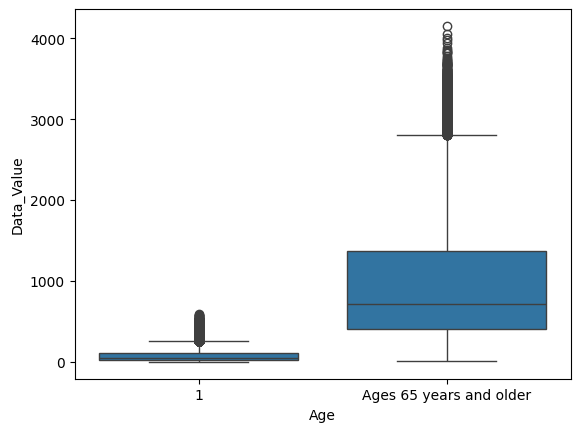

In [33]:
import seaborn as sns
sns.boxplot(data=heartdisease_cleaned, x='Age', y='Data_Value')

In [17]:
# One-hot encode 'race' only (drop first to avoid dummy variable trap)
heartdisease_cleaned = pd.get_dummies(
    heartdisease_cleaned,
    columns=['Race'],
    drop_first=True
)

In [18]:
print(heartdisease_cleaned.columns)

Index(['Year', 'LocationAbbr', 'Disease Type', 'Data_Value',
       'Confidence_limit_Low', 'Confidence_limit_High', 'Age', 'Gender',
       'Race_Asian/Pacific Islander', 'Race_Black (Non-Hispanic)',
       'Race_Hispanic', 'Race_Overall', 'Race_White'],
      dtype='object')


Chi-Square

In [35]:
from scipy.stats import chi2_contingency
import pandas as pd

race_vars = ['Race_Asian/Pacific Islander', 'Race_Black (Non-Hispanic)', 'Race_Overall', 'Race_Hispanic', 'Race_White']

for var in race_vars:
  #print(heartdisease_cleaned["Race_Asian/Pacific Islander"])
    contingency = pd.crosstab(heartdisease_cleaned[var], heartdisease_cleaned['Year'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"Chi-Square for {var}: chi2 = {chi2:.4f}, p-value = {p:.4f}")

Chi-Square for Race_Asian/Pacific Islander: chi2 = 0.0000, p-value = 1.0000
Chi-Square for Race_Black (Non-Hispanic): chi2 = 0.0010, p-value = 1.0000
Chi-Square for Race_Overall: chi2 = 0.0003, p-value = 1.0000
Chi-Square for Race_Hispanic: chi2 = 0.0000, p-value = 1.0000
Chi-Square for Race_White: chi2 = 0.0000, p-value = 1.0000


ANOVA

In [24]:
from scipy.stats import f_oneway

numeric_vars = [

]

for var in numeric_vars:
    group0 = heartdisease_cleaned[heartdisease_cleaned['Gender'] == 0][var]
    group1 = heartdisease_cleaned[heartdisease_cleaned['Year'] == 1][var]
    stat, p = f_oneway(group0, group1)
    print(f"ANOVA for {var}: F-statistic = {stat:.4f}, p-value = {p:.4f}")